<a href="https://colab.research.google.com/github/Kdavid2355/practice_kaggle/blob/master/titanic_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. 데이터 셋 확인 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/practice_kaggle/titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/practice_kaggle/titanic/test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.1 NULL 데이터 확인




In [6]:

for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of Nan value: {:>.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:   Survived	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 19.87%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.00%
column:      Cabin	 Percent of Nan value: 77.10%
column:   Embarked	 Percent of Nan value: 0.22%


In [7]:
for col in df_test.columns:
  msg = 'column : {:>10}\t Percent of Nan Value {:>.2f}%'.format(col, df_test[col].isnull().sum()/df_test[col].shape[0])
  print(msg)

column : PassengerId	 Percent of Nan Value 0.00%
column :     Pclass	 Percent of Nan Value 0.00%
column :       Name	 Percent of Nan Value 0.00%
column :        Sex	 Percent of Nan Value 0.00%
column :        Age	 Percent of Nan Value 0.21%
column :      SibSp	 Percent of Nan Value 0.00%
column :      Parch	 Percent of Nan Value 0.00%
column :     Ticket	 Percent of Nan Value 0.00%
column :       Fare	 Percent of Nan Value 0.00%
column :      Cabin	 Percent of Nan Value 0.78%
column :   Embarked	 Percent of Nan Value 0.00%


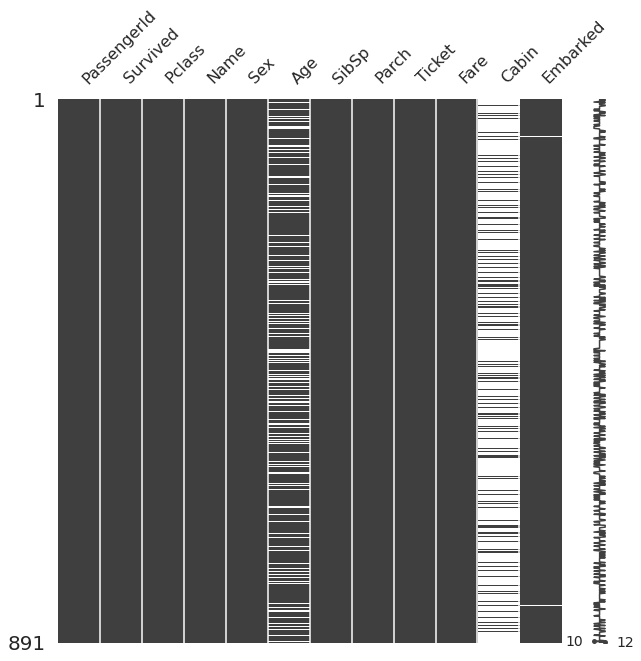

In [8]:
msno.matrix(df=df_train.iloc[:,:], figsize=(10,10))

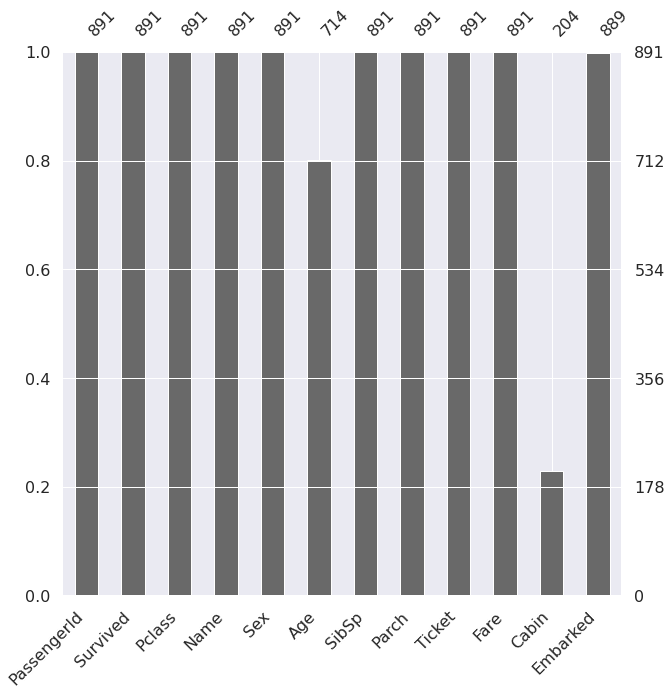

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(10,10))

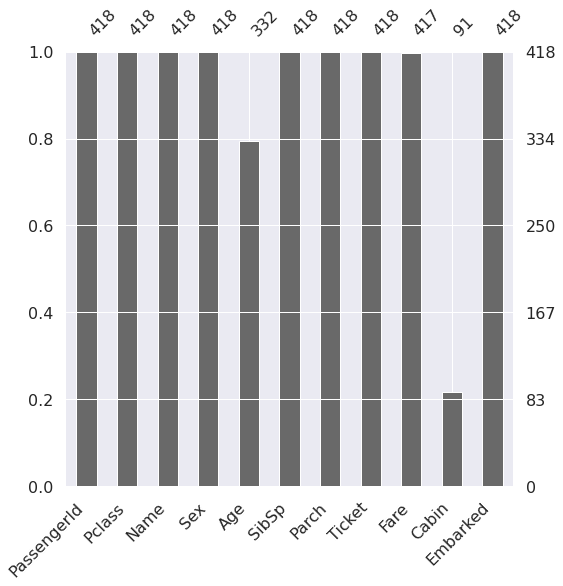

In [10]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8))

### 1.2 Target Label 확인 - 살아남은 사람 비율 그래프로 표현하기

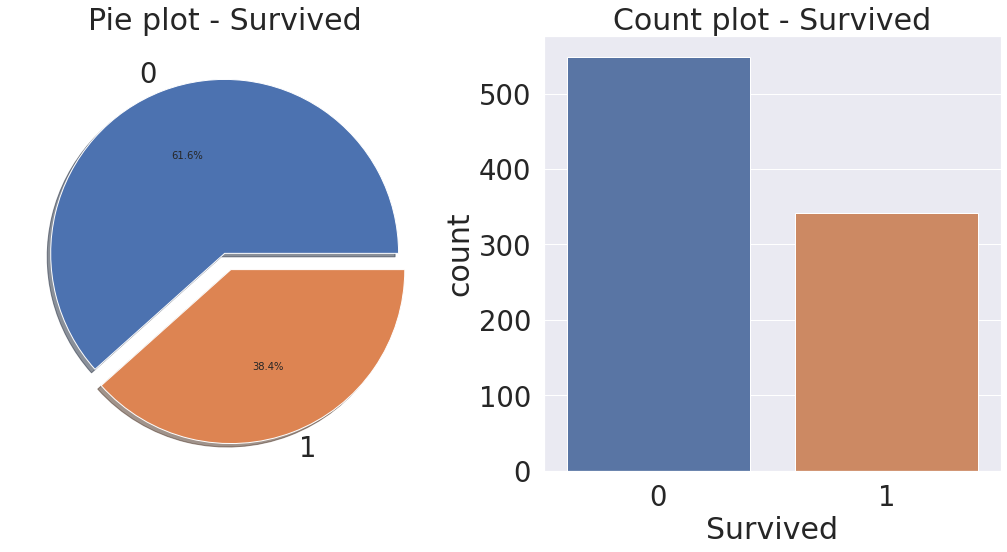

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') # 이거 안해주면 y_label 자동으로 붙어있음 
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

### 2. Exploratory data analysis

###2.1 Pclass

#### 각 class 에 몇명 있는지 확인 하기 

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


#### 각 class 별 생존한 사람수 

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


#### Crosstab 이용하기 

In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### 각 클래스별 생존 비율 구하기

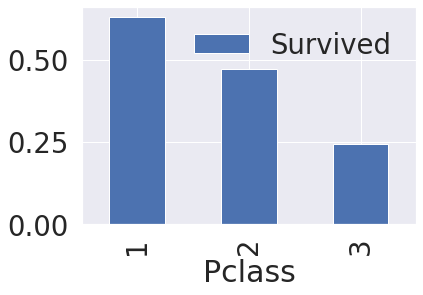

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

#### 위 내용 보기 좋게 그래프 그리기 

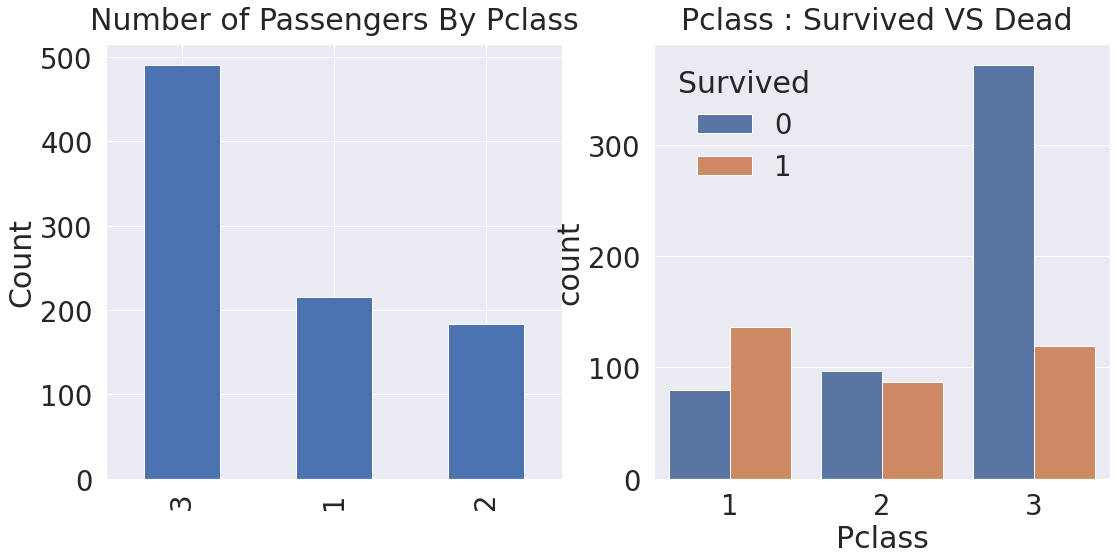

In [16]:
y_position = 1.02 
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived VS Dead ', y=y_position)
plt.show()

### 2.2 Sex

#### subplot 한번에 그려보기!

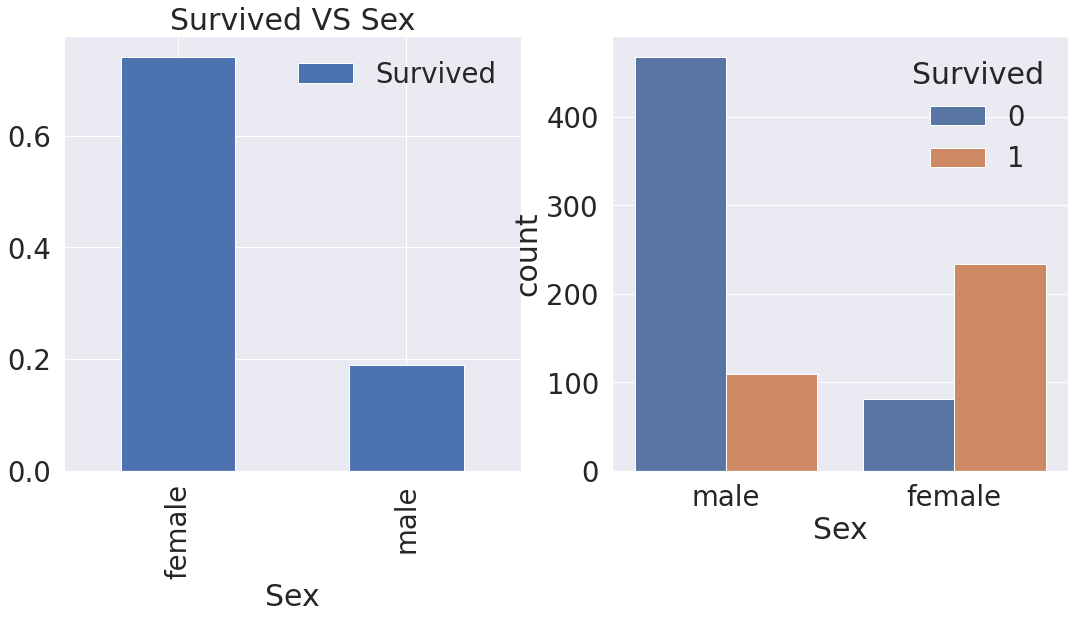

In [17]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
plt.show()

#### crosstab

In [18]:
df_train[['Survived', 'Sex']].groupby('Sex', as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r') #margins=True : 합을 보여줌 

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.3 Both Sex and Pclass 

#### factorplot 사용하기!

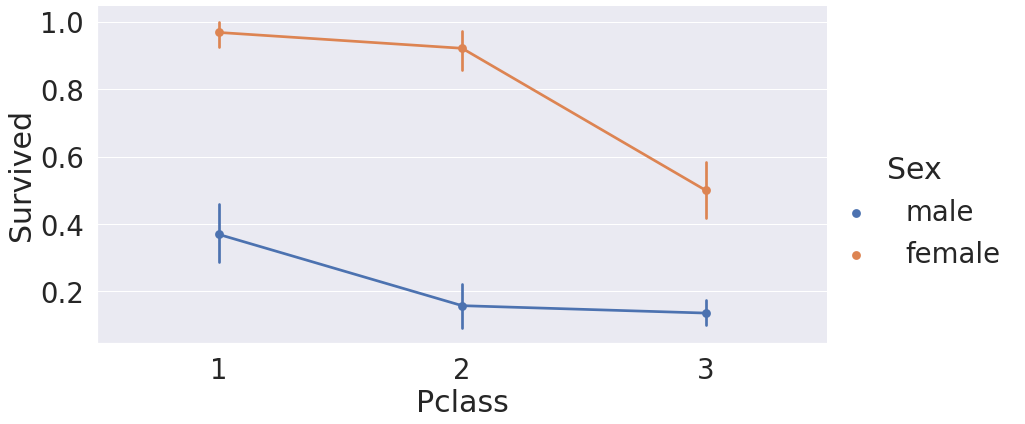

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect = 2) # size 그래프 크기,aspect x 방향 길이

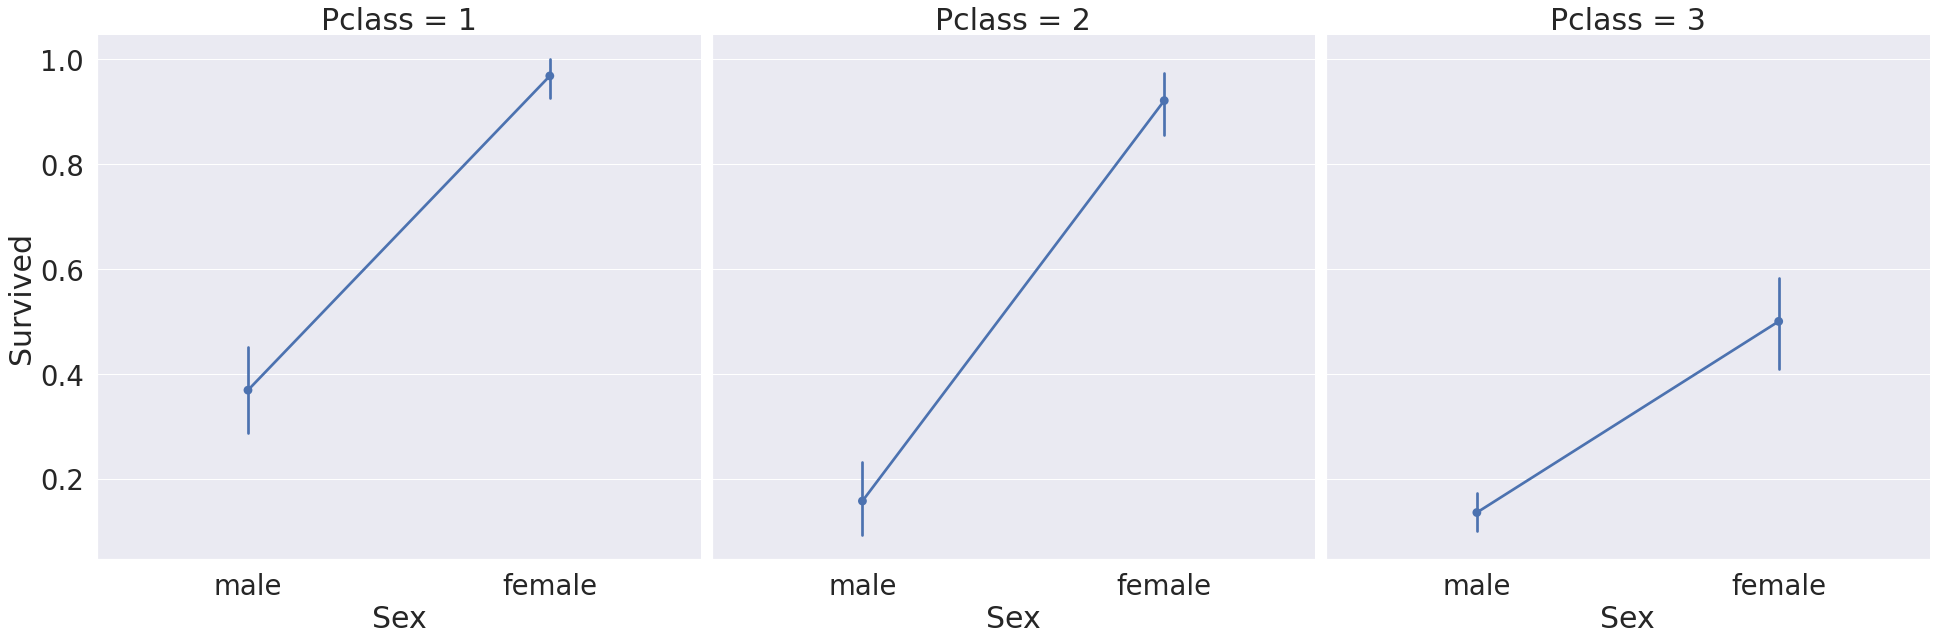

In [21]:
sns.factorplot(x='Sex', y='Survived', col="Pclass", data=df_train, satureation=5, size=9, aspect =1 )

### 2.4 AGE

#### AGE - Survived kernel density plot

In [22]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


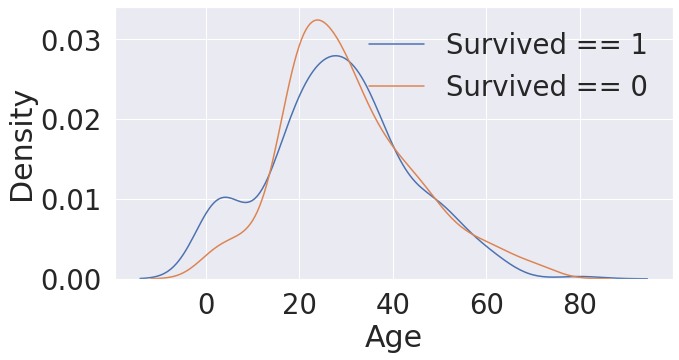

In [23]:
#생존에 따른 age 의 histogram 그려보기 
#kdeplot : kernel density plot 

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax )
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax )
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

#### age - Pclass kernel density plot 

Text(0.5, 1.0, 'Age Distribution within Classes')

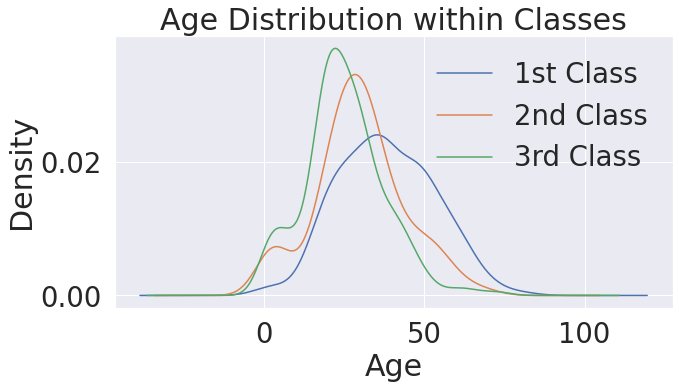

In [24]:
plt.figure(figsize=(10,5))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
plt.legend(['1st Class','2nd Class', '3rd Class'])
plt.xlabel('Age')
plt.title('Age Distribution within Classes')




#### Survival Rate change depending on range of Age

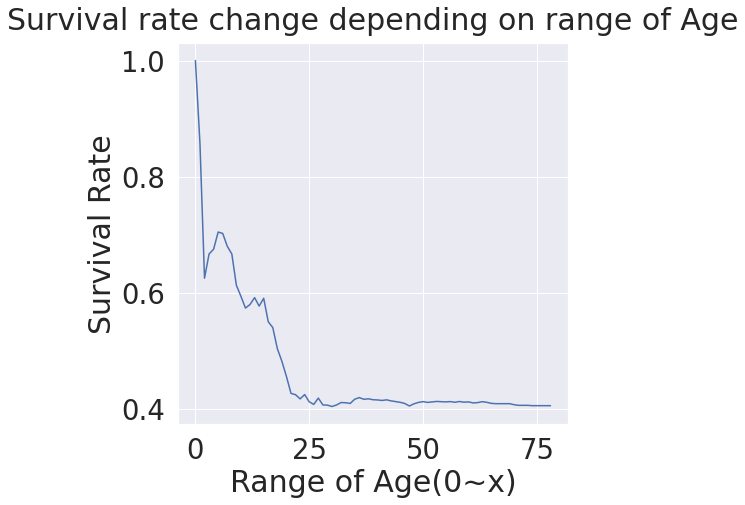

In [25]:
cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

### 2.5 Pclass, Sex, Age

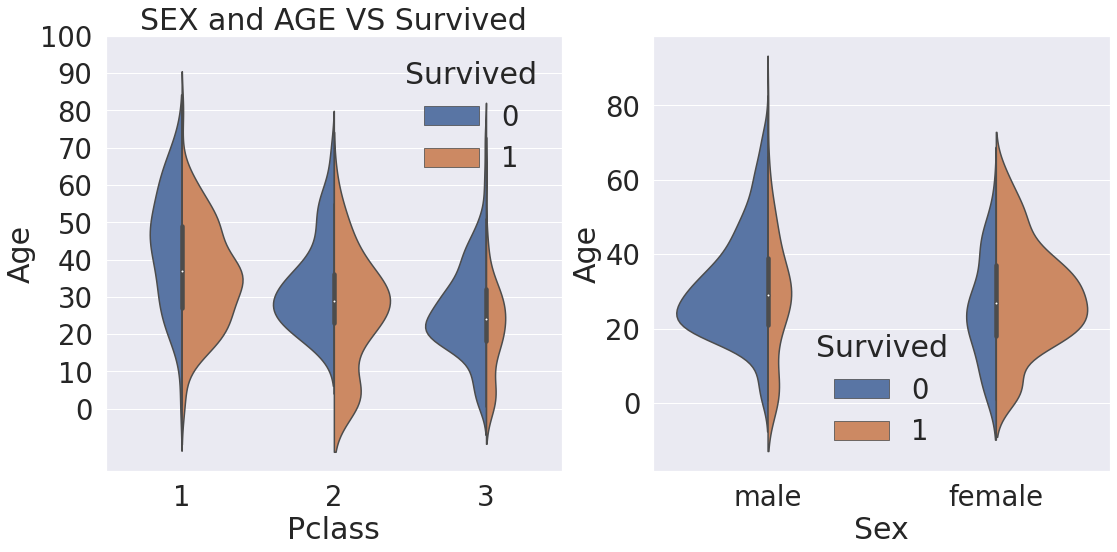

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale="count", split=True, ax=ax[1])
ax[0].set_title('SEX and AGE VS Survived')
ax[0].set_yticks(range(0,110,10))
plt.show()

### 2.6 Embarked ( 탑승한 항구 ) 

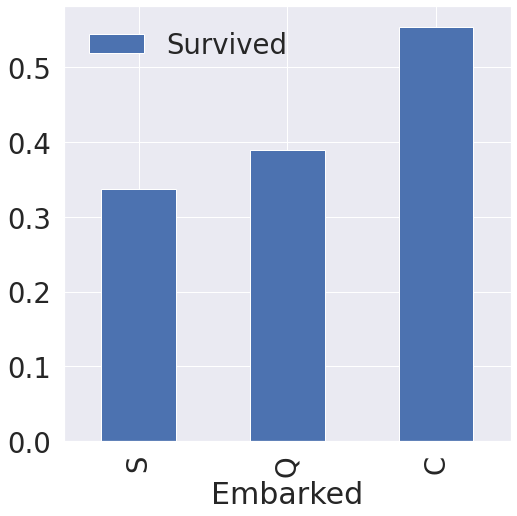

In [27]:
f, ax = plt.subplots(1,1, figsize=(8,8))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived').plot.bar(ax=ax)

Text(0.5, 1.0, '(4) Embarked VS Pclass')

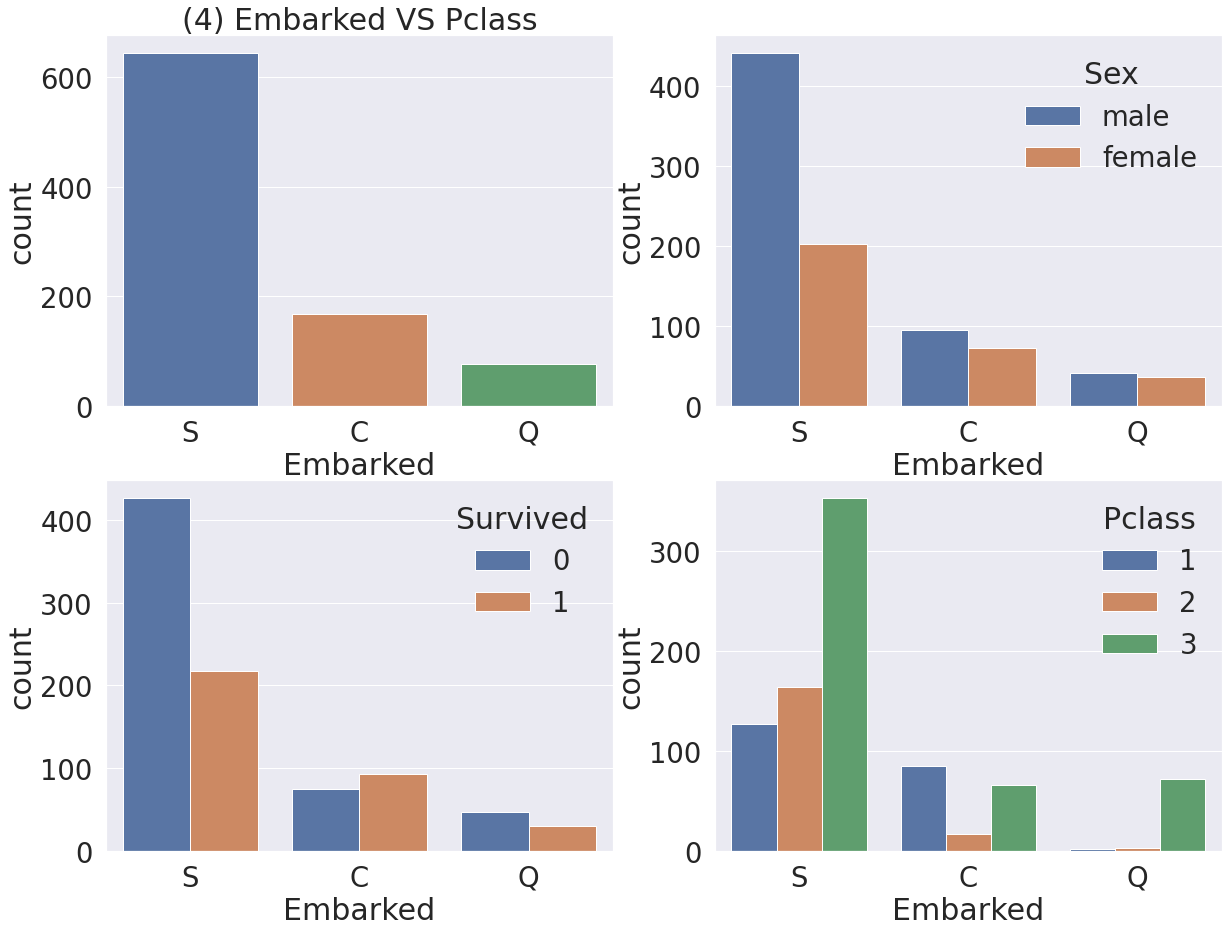

In [28]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) NO. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex', data=df_train, ax=ax[0,1])
ax[0,0].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived', data=df_train, ax=ax[1,0])
ax[0,0].set_title('(3) Embarked VS Survived')
sns.countplot('Embarked',hue='Pclass', data=df_train, ax=ax[1,1])
ax[0,0].set_title('(4) Embarked VS Pclass')

### 2.7 Family - SibSp ( 가족 구성원 수 feature 만들기 ) 

In [29]:
#SibSp 와 Parch 합하면 Family 가 됨

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #본인자신 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 #본인자신 

print("Maximum size of Family {}".format(df_train['FamilySize'].max()))
print("Minimum size of Family {}".format(df_train['FamilySize'].min()))

Maximum size of Family 11
Minimum size of Family 1


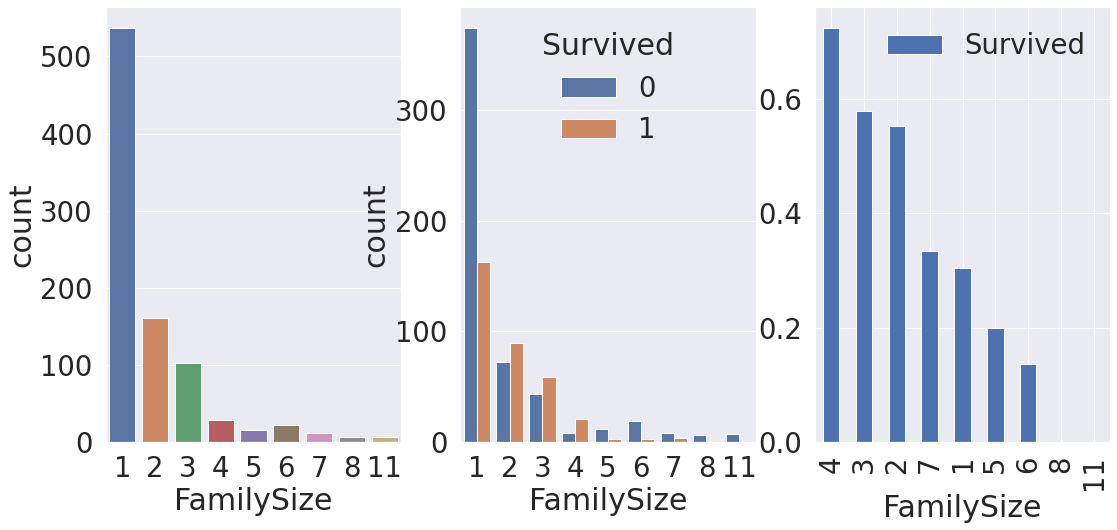

In [30]:
f, ax = plt.subplots(1,3, figsize=(18,8))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
sns.countplot('FamilySize', data=df_train, hue='Survived', ax=ax[1])
df_train[['Survived', 'FamilySize']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8 Fare

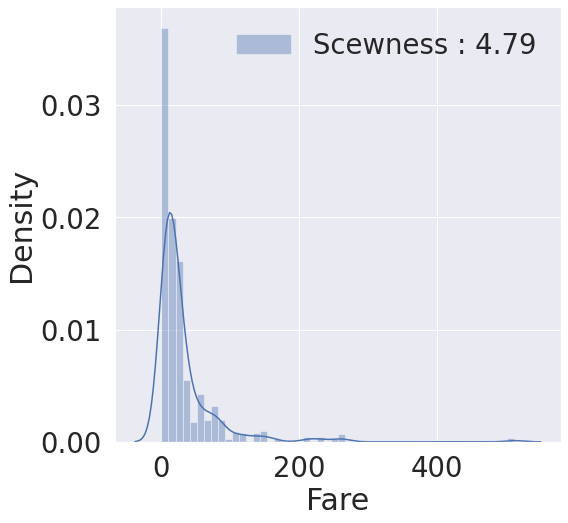

In [31]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], label='Scewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax )
g = g.legend(loc='best')

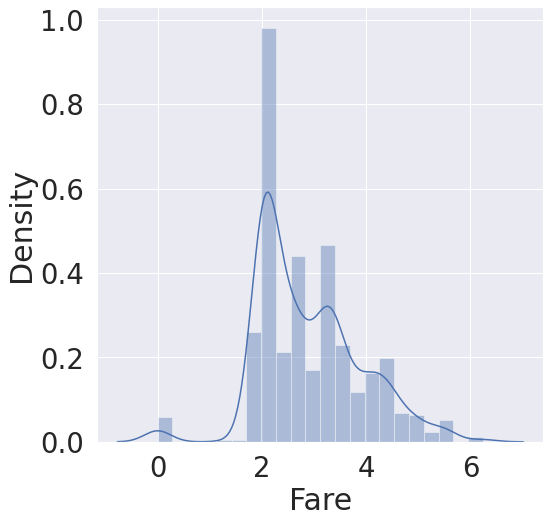

In [32]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'])
g.legend(loc='best')

### 2.9 cabin -> nan 이 너무 많아 제외

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### 2.10 Ticket 

In [40]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64